# Data Visualization Imports

Essential libraries for data visualization in the Titanic competition.

In [3]:
# Data manipulation
import pandas as pd
import numpy as np
from pathlib import Path

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# CLI utilities
import argparse
import sys
import subprocess
from typing import Optional

# Settings
%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("✓ All imports loaded successfully!")

✓ All imports loaded successfully!


## Feature Descriptions

| Column | Description | Type | Notes |
|--------|-------------|------|-------|
| **PassengerId** | Unique identifier for each passenger | Integer | 1-891 in train, 892-1309 in test |
| **Survived** | Target variable: survival status | Binary | 0 = Did not survive, 1 = Survived |
| **Pclass** | Passenger class/ticket | Categorical | 1 = 1st/Upper, 2 = 2nd/Middle, 3 = 3rd/Lower |
| **Name** | Passenger's full name | String | Contains title (Mr, Mrs, Miss, etc.) |
| **Sex** | Passenger gender | Categorical | male, female |
| **Age** | Passenger age in years | Float | < 1 for infants, xx.5 for estimated |
| **SibSp** | Siblings/spouses aboard | Integer | Family relationships |
| **Parch** | Parents/children aboard | Integer | Family relationships |
| **Ticket** | Ticket number | String | Alphanumeric, may contain duplicates |
| **Fare** | Passenger fare (in £) | Float | Varies by class, cabin, family size |
| **Cabin** | Cabin number | String | Many missing, format: Deck/Room |
| **Embarked** | Port of embarkation | Categorical | C = Cherbourg, Q = Queenstown, S = Southampton |

## Passenger Distribution by Class and Gender

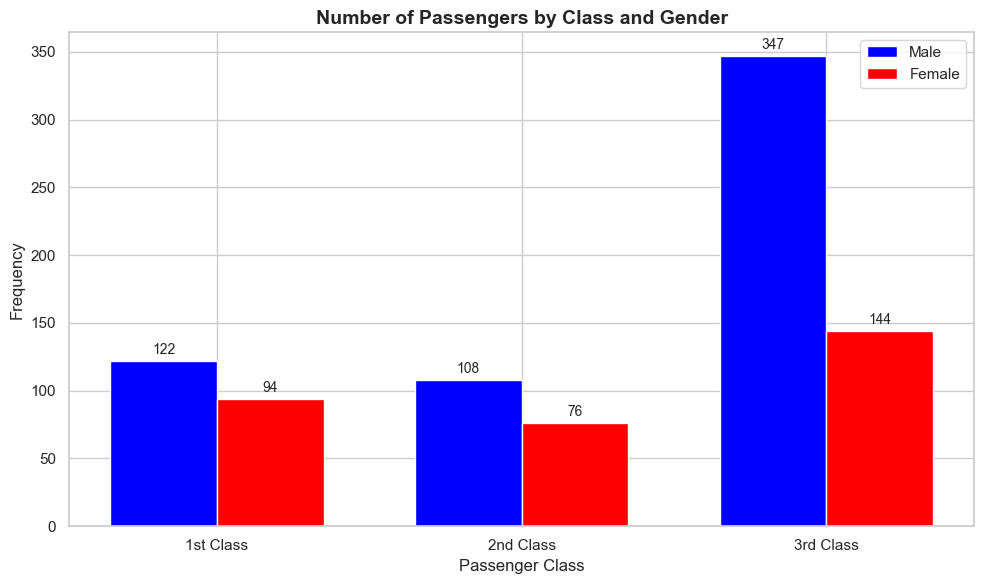


Summary:
Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


In [4]:
# Load training data
train_df = pd.read_csv("train.csv")

# Group by Pclass and Sex
pclass_gender_counts = train_df.groupby(['Pclass', 'Sex']).size().unstack(fill_value=0)

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(pclass_gender_counts.index))
width = 0.35

# Blue bars for male, red bars for female
bars_male = ax.bar(x - width/2, pclass_gender_counts['male'], width, label='Male', color='blue')
bars_female = ax.bar(x + width/2, pclass_gender_counts['female'], width, label='Female', color='red')

# Labels and title
ax.set_xlabel('Passenger Class', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Number of Passengers by Class and Gender', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
ax.legend()

# Add value labels on bars
for bar in bars_male:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)
for bar in bars_female:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Print summary
print("\nSummary:")
print(pclass_gender_counts)

## Survival Rate by Port of Embarkation

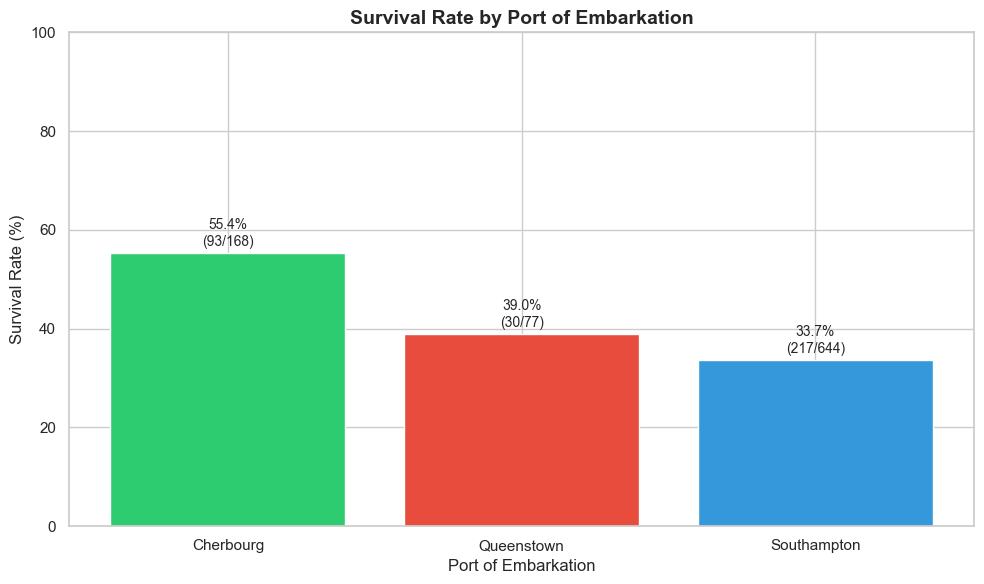


Detailed Survival Statistics by Port:
--------------------------------------------------

Cherbourg (C):
  Total passengers: 168
  Survived: 93
  Survival rate: 55.4%

Queenstown (Q):
  Total passengers: 77
  Survived: 30
  Survival rate: 39.0%

Southampton (S):
  Total passengers: 644
  Survived: 217
  Survival rate: 33.7%


In [5]:
# Calculate survival rates by embarkation port
embarked_survival = train_df.groupby('Embarked')['Survived'].agg(['mean', 'sum', 'count']).reset_index()
embarked_survival['survival_rate'] = embarked_survival['mean'] * 100

# Map embarkation codes to full names
port_names = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
embarked_survival['Port'] = embarked_survival['Embarked'].map(port_names)

# Plot survival rates
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#2ecc71', '#e74c3c', '#3498db']
bars = ax.bar(embarked_survival['Port'], embarked_survival['survival_rate'], color=colors)

# Labels and title
ax.set_xlabel('Port of Embarkation', fontsize=12)
ax.set_ylabel('Survival Rate (%)', fontsize=12)
ax.set_title('Survival Rate by Port of Embarkation', fontsize=14, fontweight='bold')
ax.set_ylim(0, 100)

# Add value labels on bars
for bar, rate, count, survived in zip(bars, embarked_survival['survival_rate'], embarked_survival['count'], embarked_survival['sum']):
    height = bar.get_height()
    ax.annotate(f'{rate:.1f}%\n({survived}/{count})', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Survival Statistics by Port:")
print("-" * 50)
for _, row in embarked_survival.iterrows():
    print(f"\n{row['Port']} ({row['Embarked']}):")
    print(f"  Total passengers: {row['count']}")
    print(f"  Survived: {row['sum']}")
    print(f"  Survival rate: {row['survival_rate']:.1f}%")

## Fare vs Cabin Analysis

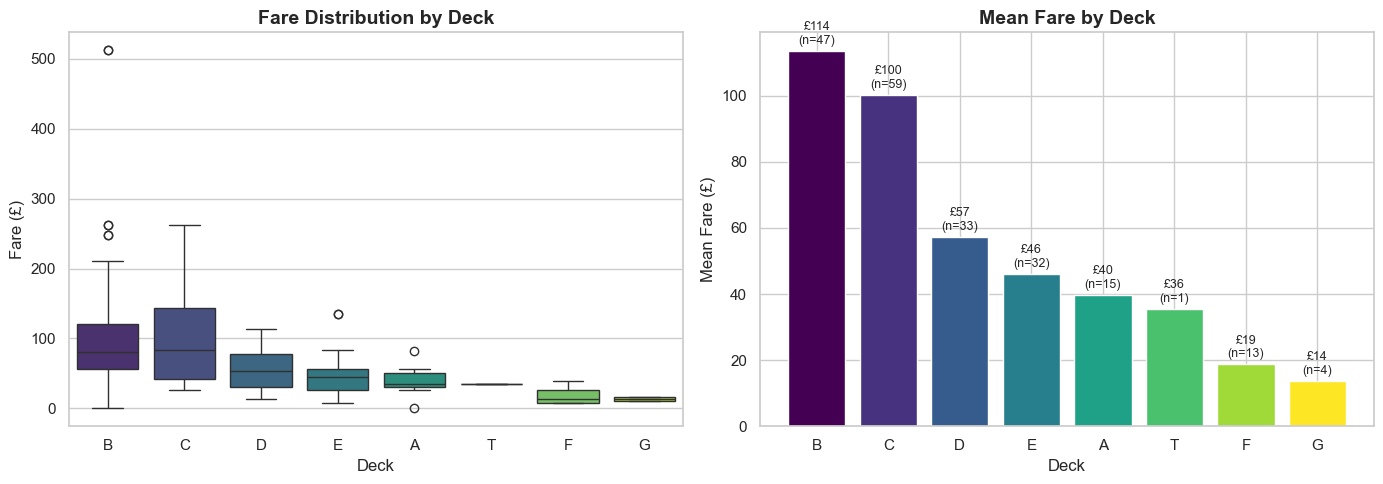


Fare Statistics by Deck
      Mean Fare  Median Fare  Min Fare  Max Fare  Passenger Count
Deck                                                             
B        113.51        80.00      0.00    512.33               47
C        100.15        83.48     26.55    263.00               59
D         57.24        53.10     12.88    113.28               33
E         46.03        45.18      8.05    134.50               32
A         39.62        35.50      0.00     81.86               15
T         35.50        35.50     35.50     35.50                1
F         18.70        13.00      7.65     39.00               13
G         13.58        13.58     10.46     16.70                4

Correlation between Deck (ordinal) and Fare: -0.418


Passengers without cabin info: 687/891 (77.1%)


In [6]:
# Load training data
train_df = pd.read_csv("train.csv")

# Filter passengers with cabin information
cabin_df = train_df[train_df['Cabin'].notna()].copy()

# Extract deck letter from cabin number
cabin_df['Deck'] = cabin_df['Cabin'].str.extract(r'([A-Za-z])', expand=False)

# Summary statistics by deck
deck_stats = cabin_df.groupby('Deck').agg({
    'Fare': ['mean', 'median', 'min', 'max', 'count']
}).round(2)
deck_stats.columns = ['Mean Fare', 'Median Fare', 'Min Fare', 'Max Fare', 'Passenger Count']
deck_stats = deck_stats.sort_values('Mean Fare', ascending=False)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Box plot of fare by deck
deck_order = deck_stats.index.tolist()
cabin_df['Deck'] = pd.Categorical(cabin_df['Deck'], categories=deck_order, ordered=True)
cabin_df_sorted = cabin_df.dropna(subset=['Deck']).sort_values('Deck')

sns.boxplot(data=cabin_df_sorted, x='Deck', y='Fare', ax=axes[0], palette='viridis')
axes[0].set_xlabel('Deck', fontsize=12)
axes[0].set_ylabel('Fare (£)', fontsize=12)
axes[0].set_title('Fare Distribution by Deck', fontsize=14, fontweight='bold')

# Plot 2: Bar chart of mean fare by deck
colors = plt.cm.viridis(np.linspace(0, 1, len(deck_stats)))
bars = axes[1].bar(deck_stats.index, deck_stats['Mean Fare'], color=colors)
axes[1].set_xlabel('Deck', fontsize=12)
axes[1].set_ylabel('Mean Fare (£)', fontsize=12)
axes[1].set_title('Mean Fare by Deck', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar, count in zip(bars, deck_stats['Passenger Count']):
    height = bar.get_height()
    axes[1].annotate(f'£{height:.0f}\n(n={count})', 
                      xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 3), textcoords="offset points", 
                      ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("Fare Statistics by Deck")
print("="*60)
print(deck_stats)

# Calculate correlation
correlation = cabin_df['Fare'].corr(cabin_df['Deck'].cat.codes)
print(f"\nCorrelation between Deck (ordinal) and Fare: {correlation:.3f}")

# Missing cabin analysis
missing_cabin = train_df['Cabin'].isna().sum()
total = len(train_df)
print(f"\n\nPassengers without cabin info: {missing_cabin}/{total} ({missing_cabin/total*100:.1f}%)")